In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
trainset = pd.read_csv('/home/kandpal/Downloads/mnist_train.csv', header=None, dtype='float64')
testset = pd.read_csv('/home/kandpal/Downloads/mnist_test.csv', header=None, dtype='float64')

train_labels = trainset[0]
test_labels = testset[0]

In [3]:
trainset.drop(columns=0, inplace = True)
testset.drop(columns=0, inplace = True)

(784,)


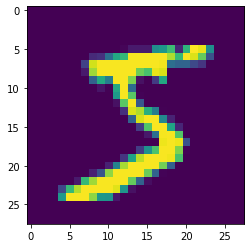

In [4]:
first_image = np.array(list(trainset.iloc[0]))
print(first_image.shape)
plt.imshow(first_image.reshape(28,28))

In [5]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.linear1 = nn.Linear(784, 100) # encoder first layer
        self.linear2 = nn.Linear(100, 50) # encoder second layer, returns bottleneck layer
        self.linear3 = nn.Linear(50, 100) # decoder first layer
        self.linear4 = nn.Linear(100, 784) # decoder second layer, returns the reconstruction
        
    
    def Encoder(self, image):
        
        hidden_encoder = F.relu(self.linear1(image)) 
        bottleneck = F.relu(self.linear2(hidden_encoder))
        
        return bottleneck
  

    def Decoder(self, bottleneck):
        
        hidden_decoder = F.relu(self.linear3(bottleneck))
        reconstruction = F.relu(self.linear4(hidden_decoder))
        
        return reconstruction
    

ae_model = Model().cuda()        

In [6]:
loss_function = nn.MSELoss() # parameters : (input, target)
optimizer = torch.optim.Adam(ae_model.parameters())

epoch number 1 : total epoch loss = 132285839.1171112


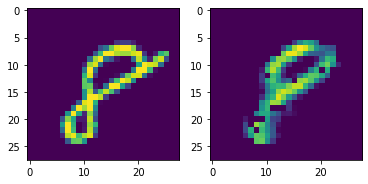

epoch number 2 : total epoch loss = 114927224.81645203


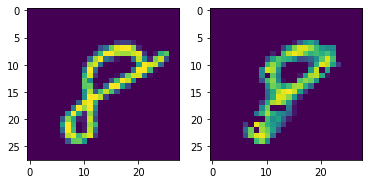

epoch number 3 : total epoch loss = 111765515.98284912


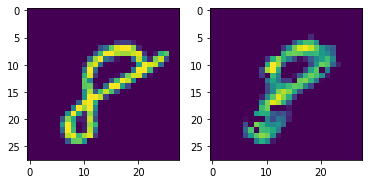

epoch number 4 : total epoch loss = 109910669.30853271


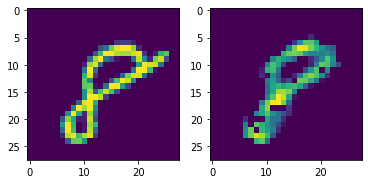

epoch number 5 : total epoch loss = 109514484.38917542


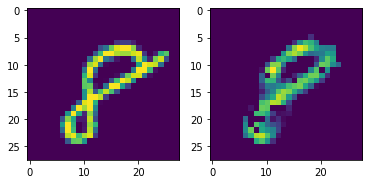

epoch number 6 : total epoch loss = 109030232.72927856


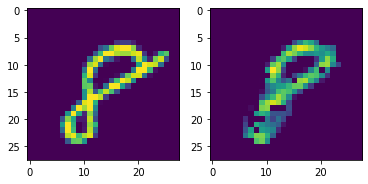

epoch number 7 : total epoch loss = 108789884.69944763


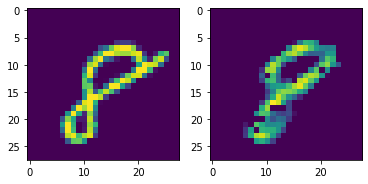

epoch number 8 : total epoch loss = 108623690.89710999


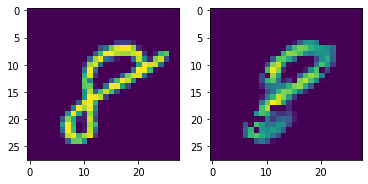

epoch number 9 : total epoch loss = 108491239.41075134


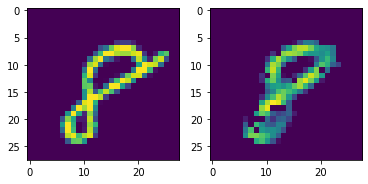

epoch number 10 : total epoch loss = 108379901.54672241


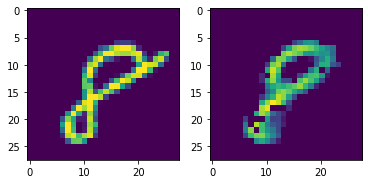

In [7]:
# ae training

epochs = 10
costs = []

for iteration in range(epochs):
    
    epoch_loss = 0
    
    for image_number in range(len(trainset.index)):
        
        image = np.array(list(trainset.iloc[image_number]))
        image = torch.from_numpy(image).float()
        
        bottleneck = ae_model.Encoder(image.cuda())
        reconstruction = ae_model.Decoder(bottleneck.cuda())
        
        loss = loss_function(image.cuda(), reconstruction.cuda())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        costs.append(loss.item())
        epoch_loss += loss.item() # .item() is used to get the value out of the tensor

    
    print(f'epoch number {iteration+1} : total epoch loss = {epoch_loss}')
    
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(image.cpu().detach().reshape(28,28).numpy())

    plt.subplot(122)
    plt.imshow(reconstruction.cpu().detach().reshape(28,28).numpy())
    plt.show()

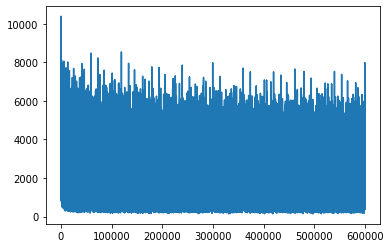

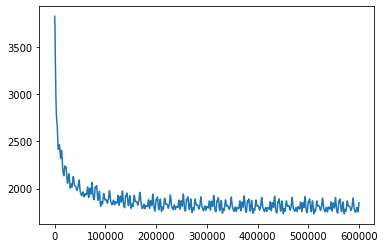

In [8]:
plt.plot(costs)
plt.show()

from scipy.ndimage import gaussian_filter

cost = [float(i) for i in costs]
smooth = gaussian_filter(cost,sigma=900)
plt.plot(smooth)
plt.show()